In [75]:
import numpy as np
import numpy.ma as ma
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn as sl 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import PolynomialFeatures
from sklearn import svm
from sklearn.ensemble import StackingClassifier
from sklearn.preprocessing import MinMaxScaler

Pulsar = pd.read_csv("pulsar_stars.csv")
df = pd.DataFrame(Pulsar)

df = df.set_axis(['IP Mean', 'IP Sd', 'IP Kurtosis', 'IP Skewness', 'DM-SNR Mean', 'DM-SNR Sd', 'DM-SNR Kurtosis', 'DM-SNR Skewness', 'target_class'], axis=1)
print (df)
df['target_class'].value_counts(normalize=1)*100
X = df.drop(['target_class'], axis=1)
y = df['target_class']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
#X_train_scaled = X_train
#X_test_scaled = X_test
svc = svm.SVC(kernel='poly').fit(X_train, y_train)






          IP Mean      IP Sd  IP Kurtosis  IP Skewness  DM-SNR Mean  \
0      140.562500  55.683782    -0.234571    -0.699648     3.199833   
1      102.507812  58.882430     0.465318    -0.515088     1.677258   
2      103.015625  39.341649     0.323328     1.051164     3.121237   
3      136.750000  57.178449    -0.068415    -0.636238     3.642977   
4       88.726562  40.672225     0.600866     1.123492     1.178930   
...           ...        ...          ...          ...          ...   
17893  136.429688  59.847421    -0.187846    -0.738123     1.296823   
17894  122.554688  49.485605     0.127978     0.323061    16.409699   
17895  119.335938  59.935939     0.159363    -0.743025    21.430602   
17896  114.507812  53.902400     0.201161    -0.024789     1.946488   
17897   57.062500  85.797340     1.406391     0.089520   188.306020   

       DM-SNR Sd  DM-SNR Kurtosis  DM-SNR Skewness  target_class  
0      19.110426         7.975532        74.242225             0  
1      14.860

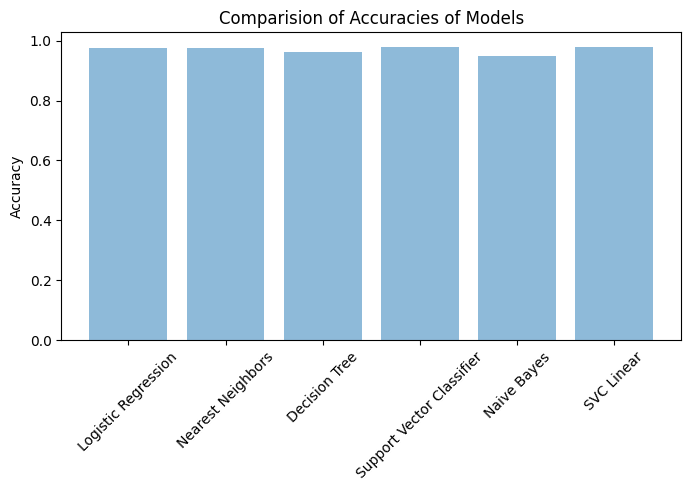

[0.9770949720670391, 0.976536312849162, 0.9625698324022346, 0.979608938547486, 0.9474860335195531, 0.9779329608938547]


In [76]:
from sklearn.metrics import accuracy_score

y_pred = svc.predict(X_test)
accuracy_score(y_true=y_test, y_pred=y_pred)

models = [('Logistic Regression',LogisticRegression()),
 ('Nearest Neighbors',KNeighborsClassifier()),
 ('Decision Tree',DecisionTreeClassifier()),
 ('Support Vector Classifier',SVC()),
 ('Naive Bayes',GaussianNB()),
 ('SVC Linear', SVC(kernel='linear'))]

GoodModels = []
accuracy_list = []
for model in models:
 model[1].fit(X_train_scaled, y_train)
 y_pred = model[1].predict(X_test_scaled)
 accuracy_list.append(accuracy_score(y_test, y_pred))
 if accuracy_score(y_test, y_pred) > 0.97:
  GoodModels.append(model)
plt.figure(figsize=(8, 4))
model_names = [x[0] for x in models]
y_pos = range(len(models))
plt.bar(y_pos, accuracy_list, align='center', alpha=0.5)
plt.xticks(y_pos, [x[0] for x in models], rotation=45)
plt.ylabel('Accuracy')
plt.title('Comparision of Accuracies of Models')
plt.show()
print(accuracy_list)

In [77]:
stacking_model = StackingClassifier(estimators=GoodModels, final_estimator=LogisticRegression(), cv=5)
stacking_model.fit(X_train_scaled, y_train)
y_pred = stacking_model.predict(X_test_scaled)
accuracy_score(y_test,y_pred)



0.979050279329609